<a href="https://colab.research.google.com/github/ishikasingh21/Plant-Disease-detection/blob/main/Plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import warnings
warnings.filterwarnings('ignore')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
img_size=256
bat_size=32
channel=3
epoch=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/plant disease detection/Plant databasse",
                                        shuffle=True,
                                        image_size=(img_size,img_size),
                                        batch_size=bat_size)

Found 2152 files belonging to 3 classes.


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 15 kB/s 
     |████████████████████████████████| 439 kB 51.5 MB/s 
     |████████████████████████████████| 6.0 MB 45.5 MB/s 
     |████████████████████████████████| 1.7 MB 46.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
len(dataset)

68

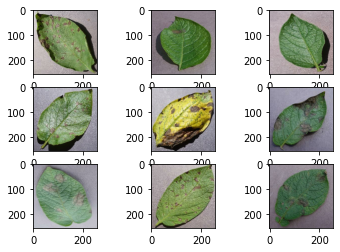

In [ ]:
for image_batch,label_batch in dataset.take(1):
    for i in range(9):
      ax=plt.subplot(3,3,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      #plt.axis("off")
      #plt.title(class_names[label_batch[0]])
    #print(image_batch[0])
   #print(label_batch.numpy())

## Function for spliting the dataset

In [ ]:
def dataset_partitions(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=4)
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    test_size=int(ds_size*test_split)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=dataset_partitions(dataset)
print(len(train_ds))

54


##Data Augmentation

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape=(bat_size,img_size,img_size,channel)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=epoch,
    batch_size=bat_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
54/54 [==============================] - ETA: 0s - loss: 0.9099 - accuracy: 0.4902

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
54/54 [==============================] - 767s 4s/step - loss: 0.9099 - accuracy: 0.4902 - val_loss: 0.8489 - val_accuracy: 0.6094
Epoch 2/50
54/54 [==============================] - 213s 4s/step - loss: 0.6557 - accuracy: 0.7292 - val_loss: 0.5519 - val_accuracy: 0.7708
Epoch 3/50
54/54 [==============================] - 214s 4s/step - loss: 0.3630 - accuracy: 0.8380 - val_loss: 0.2996 - val_accuracy: 0.8594
Epoch 4/50
54/54 [==============================] - 209s 4s/step - loss: 0.2602 - accuracy: 0.9132 - val_loss: 0.6446 - val_accuracy: 0.7708
Epoch 5/50
54/54 [==============================] - 206s 4s/step - loss: 0.2218 - accuracy: 0.9057 - val

In [ ]:
scores=model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

In [ ]:
history.history.keys()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(epoch),accuracy,label="Training_accuracy")
plt.plot(range(epoch),val_accuracy,label="Validation_accuracy")
plt.legend(loc="lower right")
plt.title("Training_and_validation_accuracy")
plt.subplot(1,2,2)
plt.plot(range(epoch),loss,label="Training_loss")
plt.plot(range(epoch),val_loss,label="Validation_loss")
plt.legend(loc="upper right")
plt.title("Training_and_validation_loss")
plt.show()

In [ ]:
#import ipdb
import numpy as np
for image_batch,labels_batch in dataset.take(1):
  #ipdb. set_trace()
  first_image=image_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()
  print("First image to predict")
  plt.imshow(first_image)
  print("First image actual label:",class_names[first_label])
  batch_prediction=model.predict(image_batch)
  print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def prediction(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(image[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

In [ ]:
plt.figure(figsize=(15,15))
for image,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    predicted_class,confidence=prediction(model,image[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual class:{actual_class}\n Predicted class:{predicted_class}\n Confidence:{confidence}")
    plt.axis("off")

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def predict_image(inp):
  inp = inp.reshape((-1,256,256,3))
  prediction = model.predict(inp)[0]
  confidences = {class_names[i]: float(prediction[i]) for i in range(3)}
  return confidences

In [ ]:
import gradio as gr
image = gr.inputs.Image(shape=(256,256))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

In [ ]:
!pip install ipdb